### Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_palette('husl')

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

### Leitura e pré-visualização dos dados (Preview of Data)

In [2]:
df = pd.read_csv ("iris.csv")

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['target'].value_counts()

SETOSA        50
VERSICOLOR    50
VIRGINICA     50
Name: target, dtype: int64

### Visualização dos Dados  (Data Visualization)

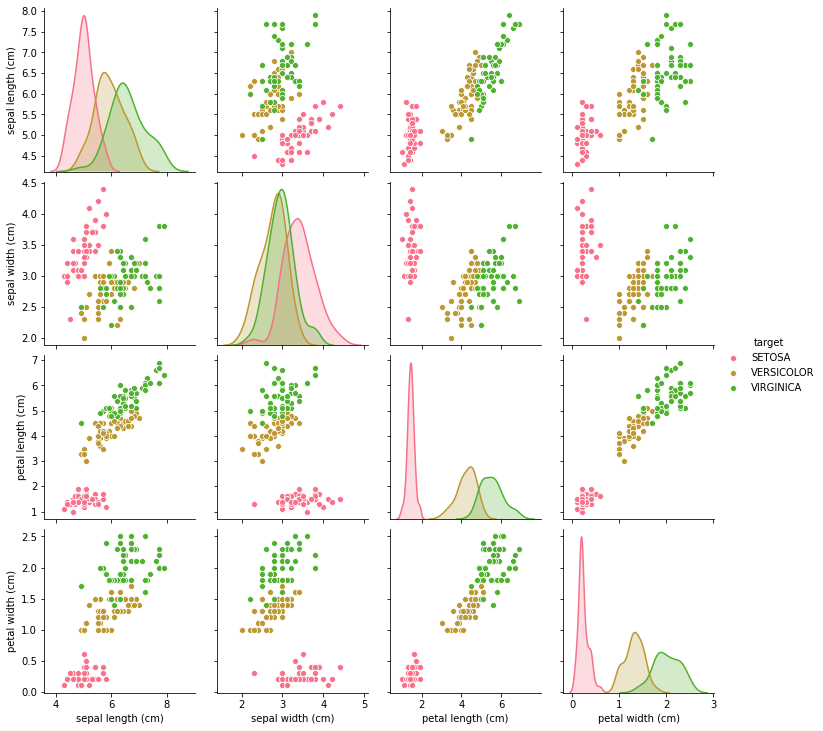

In [7]:
sb.pairplot(df,hue="target") # Gráfico DISPERSÃO

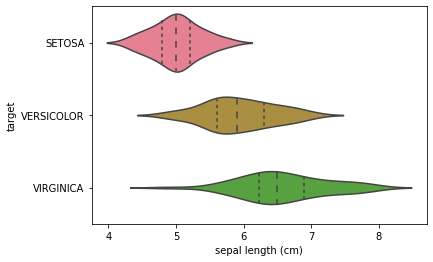

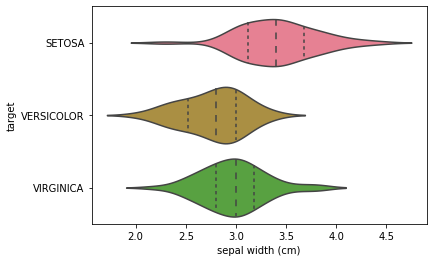

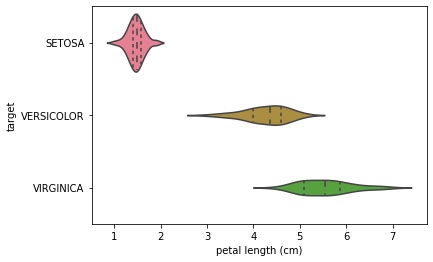

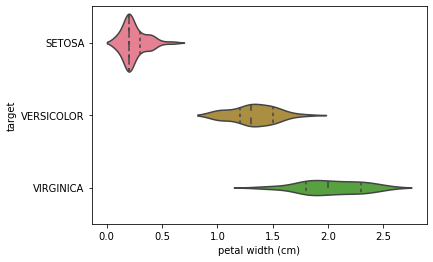

In [8]:
g = sb.violinplot(y='target', x='sepal length (cm)', data=df, inner='quartile')
plt.show()

g = sb.violinplot(y='target', x='sepal width (cm)', data=df, inner='quartile')
plt.show()

g = sb.violinplot(y='target', x='petal length (cm)', data=df, inner='quartile')
plt.show()

g = sb.violinplot(y='target', x='petal width (cm)', data=df, inner='quartile')
plt.show()

### Caracteríscas/features e Rótulos que serão utilizadas para classificação. (Modelling)

In [9]:
x = np.array(df.drop("target",1))   # todas as colunas do arquivo .CSV exceto a coluna "target"
y = np.array(df.target)             # somente a coluna "target"

### Verificando a PRECISÃO da predição para diferentes valores de K (KNN)
### 1. Utilizando TODO o Dataset para treino

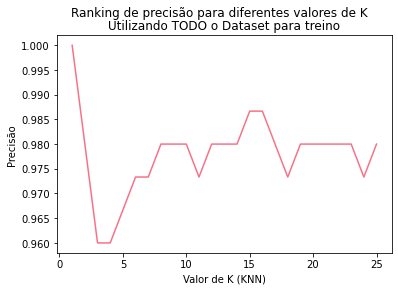

In [10]:
# Verificando a precisão da predição com diferentes valores de K
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x,y)
    y_pred = knn.predict(x)
    precisao = metrics.accuracy_score(y, y_pred)
    scores.append(precisao)

plt.plot(k_range, scores)
plt.xlabel('Valor de K (KNN)')
plt.ylabel('Precisão')
plt.suptitle('Ranking de precisão para diferentes valores de K')
plt.title('Utilizando TODO o Dataset para treino')
plt.show()

### 2. Dividindo o Dataset. Uma parte para TREINO e outra para TESTE

In [11]:
# 70% do Dataset será usado para Treino e 30% para Testes
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

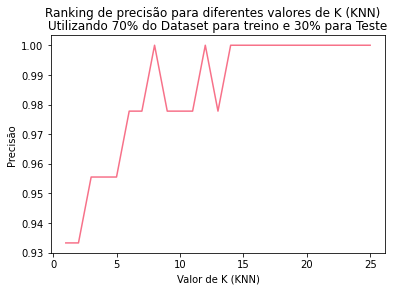

In [12]:
# Verificando a precisão da predição com diferentes valores de K
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    precisao = metrics.accuracy_score(y_test, y_pred)
    scores.append(precisao)
    
plt.plot(k_range, scores)
plt.xlabel('Valor de K (KNN)')
plt.ylabel('Precisão')
plt.suptitle('Ranking de precisão para diferentes valores de K (KNN)')
plt.title("Utilizando 70% do Dataset para treino e 30% para Teste")
plt.show()

### Criando e treinando um modelo utilizando todo o dataset para treino (k = 7 vizinhos próximos )

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x, y)
y_pred = knn.predict(x)
precisao = metrics.accuracy_score(y, y_pred)
print(precisao)

0.9733333333333334


### Criando e treinando um modelo separando o dataset em Treino (70%) e Teste (30%) (k = 7 vizinhos próximos )

In [14]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
precisao = metrics.accuracy_score(y_test, y_pred)
print(precisao)

0.9777777777777777


### Salvando o modelo Treinado

In [15]:
joblib.dump(knn, 'iris_modelo_treinado.pkl')

['iris_modelo_treinado.pkl']

# Conclusão - Predição com base em modelo treinado

### Input com informações da flor iris que se deseja predizer a espécie 
#### (Altura e Largura das sépalas e pétalas)

In [16]:
nova_flor = [4.2,3.1,2.1,0.9]

### Predição com base em novo Input

In [ ]:
 knn.predict([nova_flor])